In [437]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [438]:
df=pd.read_csv(r'D:\DATA SCIENCE\ml\Projects\online retail\OnlineRetail.csv',encoding='latin1')

In [439]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [440]:
df.shape

(541909, 8)

In [441]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [442]:
cancelled_order =df[(df['InvoiceNo'].str.contains('C'))]
cancelled_order
#these are the cancelled order as you see Invoice number start with 'c' and all the quantity are also in negatives

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [443]:
df[df['UnitPrice']<0]
#these 2 records are for adjusting the bad dept as we can see in description so we clean these data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom


In [444]:
df[(df['UnitPrice']==0) |(df['Quantity']==0)]
#As we can see there is no customer id for this data so it would become difficult for customer segmentation and analysis.
#Without customer identification,It is challenging to analyze and segment customers effectively based on their purchasing 
#behavior or other attributes.so we would have to clean all of the above data


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,12/8/2011 13:58,0.0,NaN,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,12/8/2011 13:58,0.0,NaN,United Kingdom
538554,581408,85175,NaN,20,12/8/2011 14:06,0.0,NaN,United Kingdom


In [445]:
df=df[(df['Quantity']>0)&(df['UnitPrice']>0)]

In [446]:
df.shape

(530104, 8)

In [447]:
df.duplicated().sum()

5226

In [448]:
df=df.drop_duplicates()

In [449]:
df.shape

(524878, 8)

In [450]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132186
Country             0
dtype: int64

In [451]:
# droping null values for customer id columns
df=df.dropna(subset=['CustomerID'])

In [452]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  object 
 1   StockCode    392692 non-null  object 
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  float64
 7   Country      392692 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.0+ MB


In [453]:
df
#here we see there are alphabets in stock code column and we should also check the description if its proper and also data type
#of columns need to be properly set

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [454]:
df['Description']=df['Description'].str.lower()
df['Description'] = df['Description'].str.replace('[^\w\s]', '')
df['Description'].nunique()

3877

In [455]:
df['StockCode'] = df['StockCode'].str.replace(r'\D','', regex=True)
df['StockCode'] = pd.to_numeric(df['StockCode'], errors='coerce')


In [456]:
df
#now your data is cleaned you can perform eda process

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123.0,white hanging heart t-light holder,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053.0,white metal lantern,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406.0,cream cupid hearts coat hanger,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029.0,knitted union flag hot water bottle,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029.0,red woolly hottie white heart.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613.0,pack of 20 spaceboy napkins,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899.0,children's apron dolly girl,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254.0,childrens cutlery dolly girl,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255.0,childrens cutlery circus parade,4,12/9/2011 12:50,4.15,12680.0,France


In [457]:
df.duplicated().sum()


34

In [458]:
df.drop_duplicates(inplace=True)

In [459]:
df['InvoiceNo']=df['InvoiceNo'].astype('int64')

df['StockCode']=df['StockCode'].astype('float64')

In [460]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [461]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392658 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392658 non-null  int64         
 1   StockCode    391249 non-null  float64       
 2   Description  392658 non-null  object        
 3   Quantity     392658 non-null  int64         
 4   InvoiceDate  392658 non-null  datetime64[ns]
 5   UnitPrice    392658 non-null  float64       
 6   CustomerID   392658 non-null  float64       
 7   Country      392658 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 27.0+ MB


In [462]:
df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year
df['Month/year']=pd.to_datetime(df[['Year','Month']].assign(day=1))
df['Week_day']=df['InvoiceDate'].dt.day_name()
df['Quarter']=df['InvoiceDate'].dt.quarter
df['Hour']=df['InvoiceDate'].dt.hour

In [463]:
df['Total_amount']=df['Quantity']*df['UnitPrice']

In [464]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Month/year,Week_day,Quarter,Hour,Total_amount
0,536365,85123.0,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,2010-12-01,Wednesday,4,8,15.30
1,536365,71053.0,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,2010-12-01,Wednesday,4,8,20.34
2,536365,84406.0,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,2010-12-01,Wednesday,4,8,22.00


In [465]:
df.describe()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Month,Year,Month/year,Quarter,Hour,Total_amount
count,392658.000000,391249.000000,392658.000000,392658,392658.000000,392658.000000,392658.000000,392658.000000,392658,392658.000000,392658.000000,392658.000000
mean,560591.685984,30757.554964,13.120161,2011-07-10 19:23:24.847729920,3.126093,15287.827025,7.601962,2010.934643,2011-06-26 05:05:29.673150464,2.852582,12.721462,22.633035
min,536365.000000,2.000000,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,1.000000,2010.000000,2010-12-01 00:00:00,1.000000,6.000000,0.001000
25%,549235.000000,22027.000000,2.000000,2011-04-07 11:16:00,1.250000,13955.000000,5.000000,2011.000000,2011-04-01 00:00:00,2.000000,11.000000,4.950000
50%,561874.000000,22666.000000,6.000000,2011-07-31 12:02:00,1.950000,15150.000000,8.000000,2011.000000,2011-07-01 00:00:00,3.000000,13.000000,12.450000
75%,572061.000000,23270.000000,12.000000,2011-10-20 12:53:00,3.750000,16791.000000,11.000000,2011.000000,2011-10-01 00:00:00,4.000000,14.000000,19.800000
max,581587.000000,90214.000000,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,12.000000,2011.000000,2011-12-01 00:00:00,4.000000,20.000000,168469.600000
std,13086.949124,20615.888713,180.500612,NaN,22.242790,1713.534430,3.414962,0.247155,NaN,1.121369,2.276641,311.112646


<Axes: >

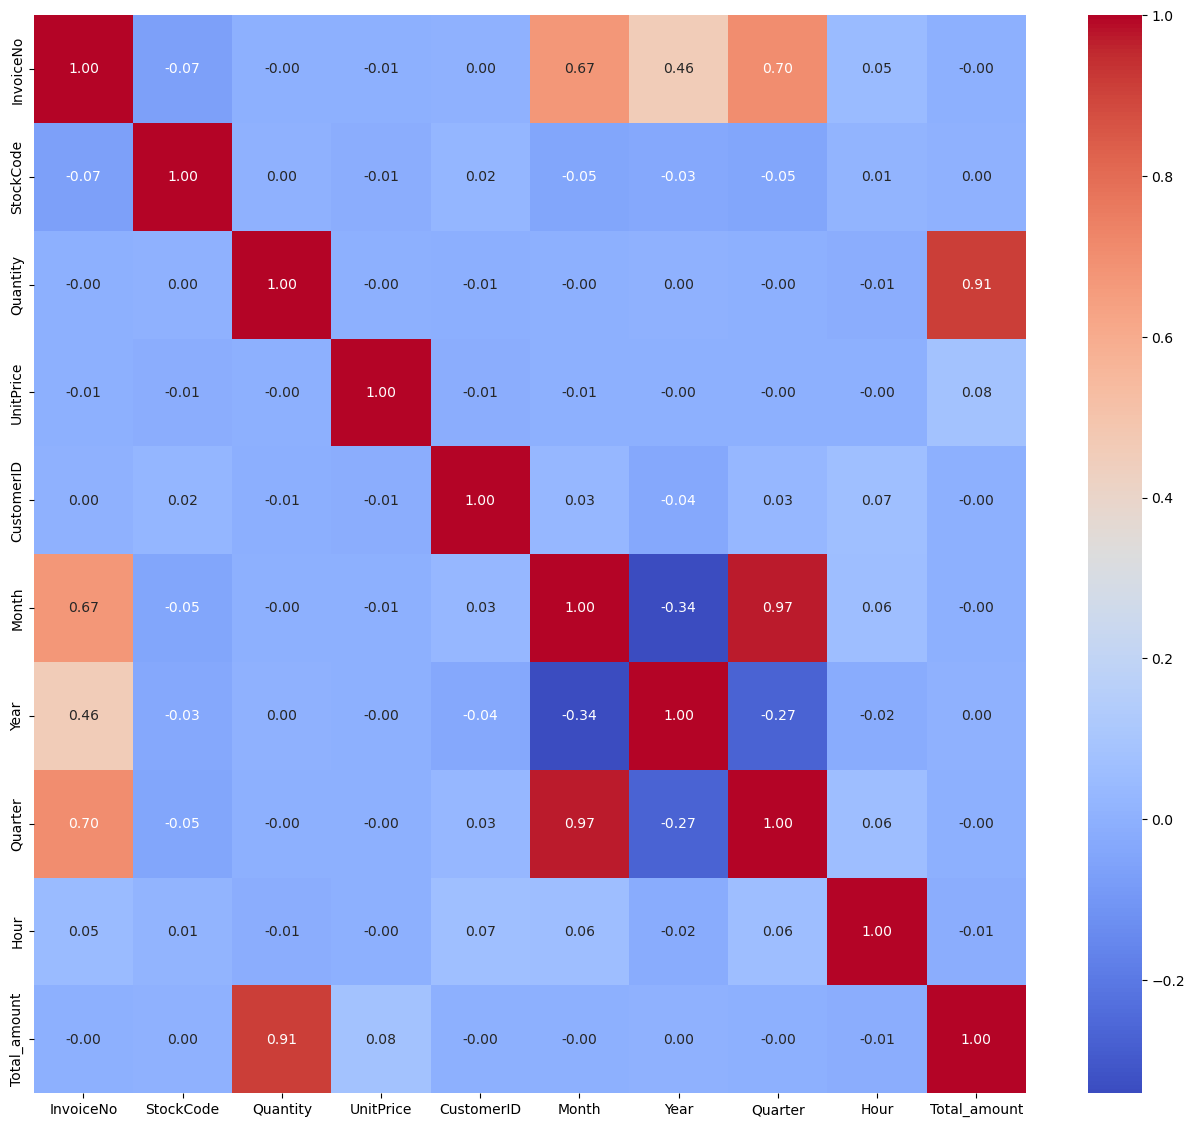

In [466]:
sns.heatmap(df.corr(numeric_only=True),cmap='coolwarm',annot=True,fmt='.2f')

# Top 10 highest selling items

In [467]:
highest_selling_products=pd.DataFrame(df.groupby(['Description'])['Quantity'].sum())
highest_selling_products.sort_values(by='Quantity',ascending=False)[:10]

,Quantity
Description,
"paper craft , little birdie",80995
medium ceramic top storage jar,77916
world war 2 gliders asstd designs,54319
jumbo bag red retrospot,46078
white hanging heart t-light holder,36706
assorted colour bird ornament,35263
pack of 72 retrospot cake cases,33670
popcorn holder,30919
rabbit night light,27153


[]

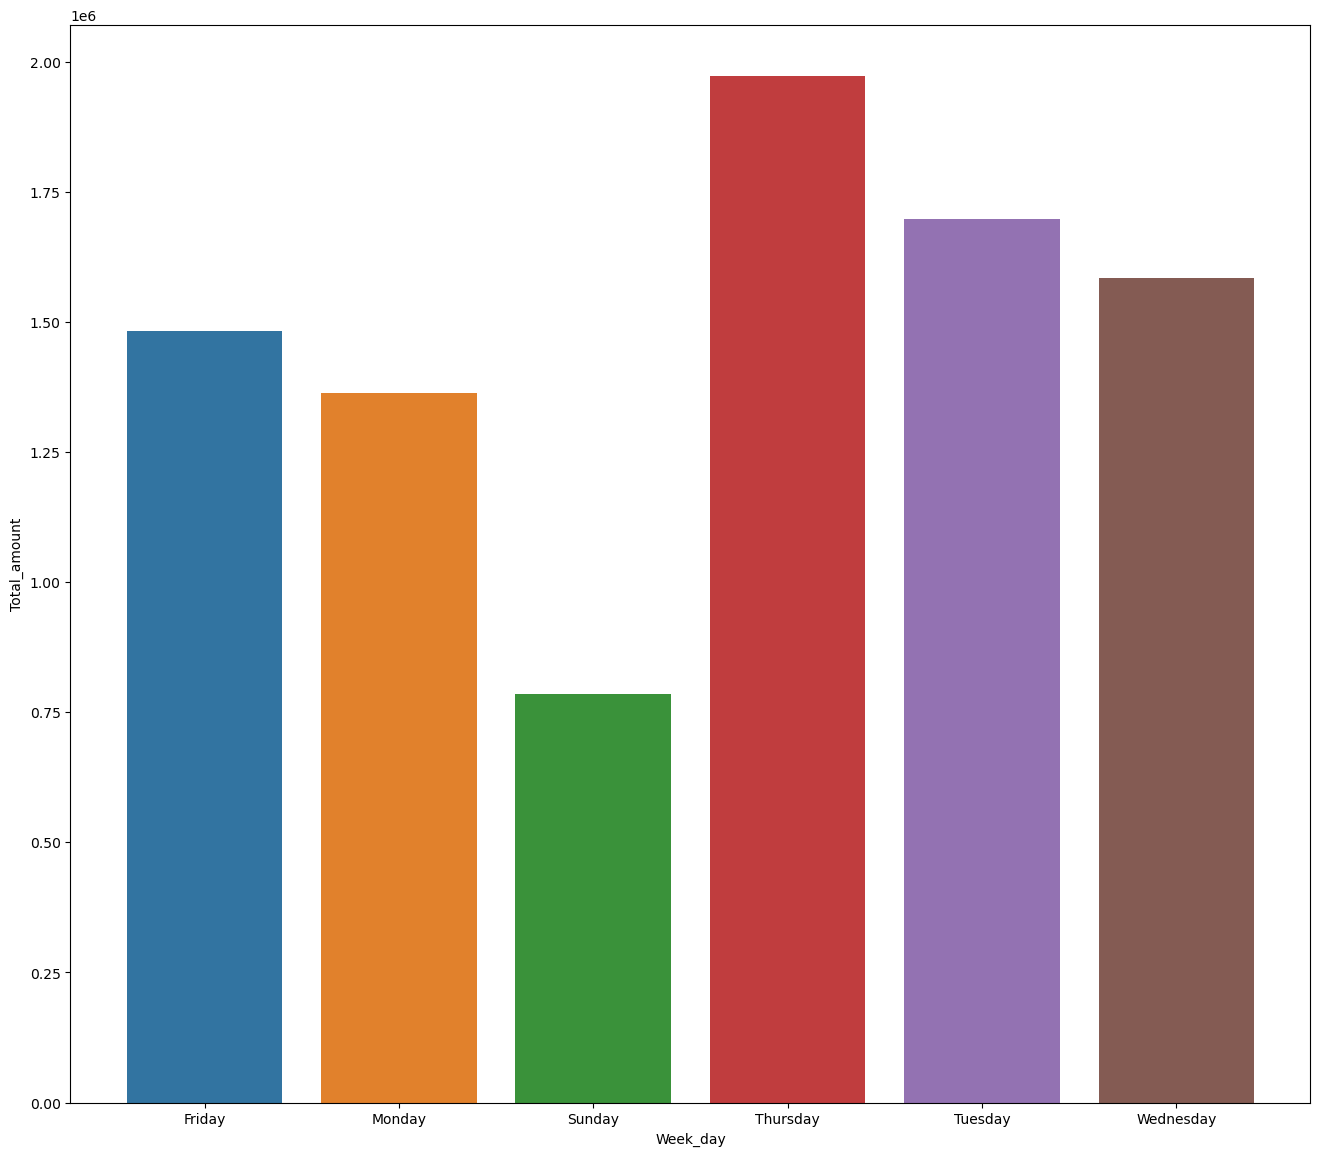

In [468]:
weekly_sales=pd.DataFrame(df.groupby(['Week_day'])['Total_amount'].sum())
weekly_sales
sns.barplot(x=weekly_sales.index,y=weekly_sales['Total_amount'])
plt.plot()


 As we can see large amount  was generatered on  Thurdays  and least amount  was generated on sunday

[]

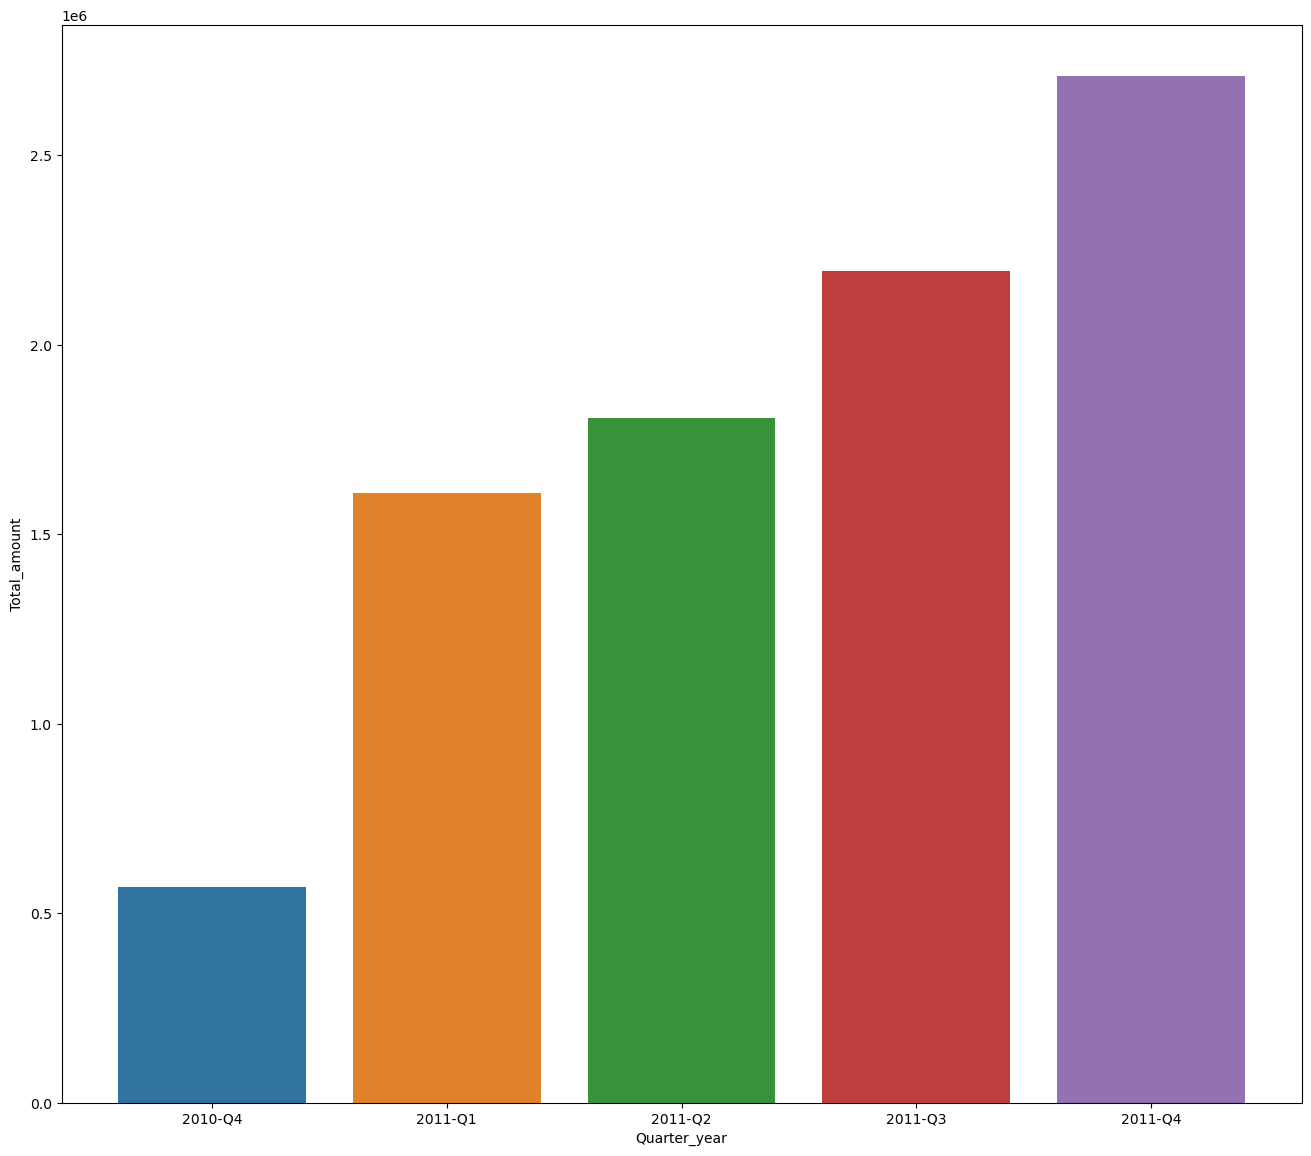

In [469]:
b=pd.DataFrame(df.groupby(['Quarter','Year'])['Total_amount'].sum()).reset_index()
b['Quarter_year']=b['Year'].astype(str)+'-Q'+b['Quarter'].astype(str)
b=b.sort_values(by=['Quarter_year'])
sns.barplot(x=b['Quarter_year'],y=b['Total_amount'])
plt.plot()


# THese are the top 10 countries with highest number of customers 

In [470]:
tp=df.groupby(['Country'])['CustomerID'].count().reset_index().sort_values(by='CustomerID',ascending=False)[:10]
tp



,Country,CustomerID
35,United Kingdom,349171
14,Germany,9025
13,France,8326
10,EIRE,7226
30,Spain,2479
23,Netherlands,2359
3,Belgium,2031
32,Switzerland,1841
26,Portugal,1453
0,Australia,1181


# Top 10 customer who made  highest revenue for comapany

In [471]:

a=df.groupby(['CustomerID'])['Total_amount'].sum().reset_index().sort_values(by='Total_amount',ascending=False)[:10].reset_index()
a

,index,CustomerID,Total_amount
0,1689,14646.0,280206.02
1,4201,18102.0,259657.30
2,3728,17450.0,194390.79
3,3008,16446.0,168472.50
4,1879,14911.0,143711.17
5,55,12415.0,124914.53
6,1333,14156.0,117210.08
7,3771,17511.0,91062.38
8,2702,16029.0,80850.84
9,0,12346.0,77183.60


# top 10 countries placing the highest orders

In [472]:
#top 10 countries placing the highest orders
a=df.groupby(['Country'])['InvoiceNo'].count().reset_index().sort_values(by='InvoiceNo',ascending=False)[:10].reset_index()
a

,index,Country,InvoiceNo
0,35,United Kingdom,349171
1,14,Germany,9025
2,13,France,8326
3,10,EIRE,7226
4,30,Spain,2479
5,23,Netherlands,2359
6,3,Belgium,2031
7,32,Switzerland,1841
8,26,Portugal,1453
9,0,Australia,1181


# RFM analysis for UK country

In [473]:
ukdata=df.copy()
ukdata=df[df['Country']=='United Kingdom']

In [474]:
ukdata

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Month/year,Week_day,Quarter,Hour,Total_amount
0,536365,85123.0,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,2010-12-01,Wednesday,4,8,15.30
1,536365,71053.0,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,2010-12-01,Wednesday,4,8,20.34
2,536365,84406.0,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,2010-12-01,Wednesday,4,8,22.00
3,536365,84029.0,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,2010-12-01,Wednesday,4,8,20.34
4,536365,84029.0,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,2010-12-01,Wednesday,4,8,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541889,581585,22466.0,fairy tale cottage night light,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,12,2011,2011-12-01,Friday,4,12,23.40
541890,581586,22061.0,large cake stand hanging strawbery,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,12,2011,2011-12-01,Friday,4,12,23.60
541891,581586,23275.0,set of 3 hanging owls ollie beak,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,12,2011,2011-12-01,Friday,4,12,30.00
541892,581586,21217.0,red retrospot round cake tins,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,12,2011,2011-12-01,Friday,4,12,214.80


In [475]:
ukdata['InvoiceDate'].max()

Timestamp('2011-12-09 12:49:00')

In [476]:
import datetime as dt
presence=dt.datetime(2011,12,12)
rfm = ukdata.groupby('CustomerID').agg({'InvoiceDate': lambda x: (presence - x.max()).days, 'InvoiceNo': lambda x: len(x), 'Total_amount': lambda x: x.sum()})
rfm['InvoiceDate'] = rfm['InvoiceDate'].astype(int)
rfm.rename(columns={'InvoiceDate': 'recency',
                         'InvoiceNo': 'frequency',
                         'Total_amount': 'monetary_value'}, inplace=True) 

C:\Users\MAYUR KINI\AppData\Local\Temp\ipykernel_2140\1662352876.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 1); sns.distplot(rfm['recency'])
C:\Users\MAYUR KINI\AppData\Local\Temp\ipykernel_2140\1662352876.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 2); sns.distplot(rf

<Axes: xlabel='monetary_value', ylabel='Density'>

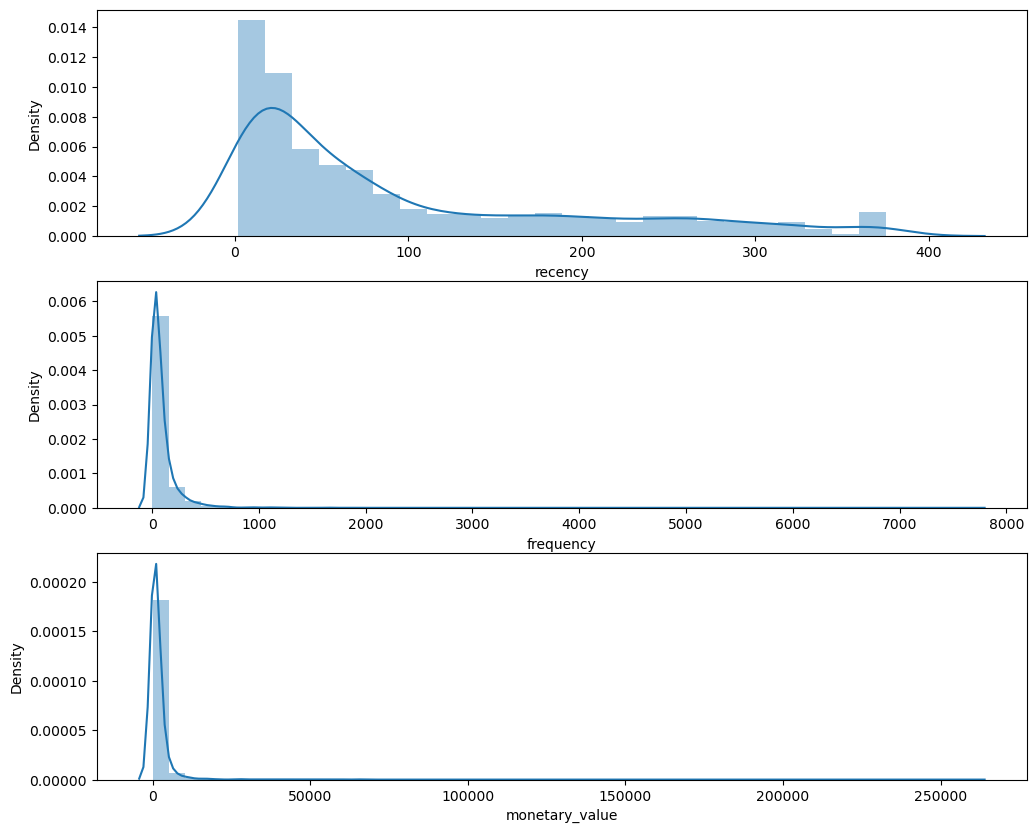

In [477]:
plt.figure(figsize=(12,10))
plt.subplot(3, 1, 1); sns.distplot(rfm['recency'])
plt.subplot(3, 1, 2); sns.distplot(rfm['frequency'])
plt.subplot(3, 1, 3); sns.distplot(rfm['monetary_value'])



In [478]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

In [479]:
sse = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k,init='k-means++', random_state=42)
    kmeans.fit(rfm_scaled)
    sse[k] = kmeans.inertia_

C:\Users\MAYUR KINI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\MAYUR KINI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\MAYUR KINI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\MAYUR KINI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\MAYUR KINI\anaconda3\lib\si

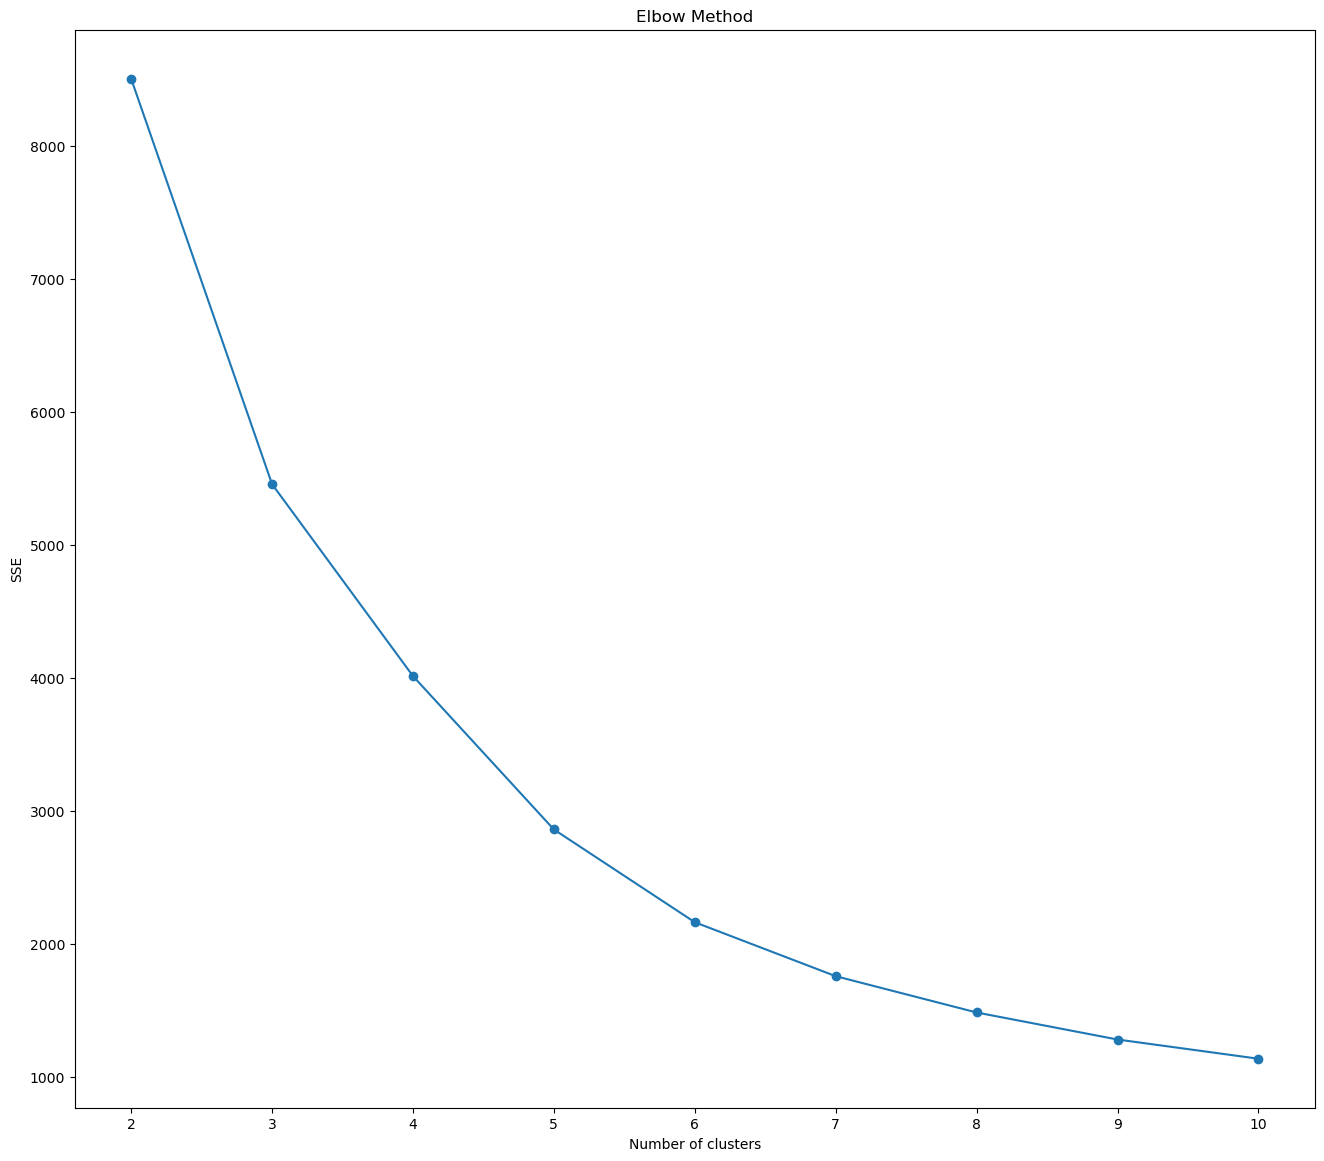

In [480]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

In [481]:

kmeans = KMeans(n_clusters=5,init='k-means++', random_state=42)
kmeans.fit(rfm_scaled)

C:\Users\MAYUR KINI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [482]:
silhouette_avg = silhouette_score(rfm_scaled, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.6165907056053727


In [483]:
rfm['Cluster'] = kmeans.labels_

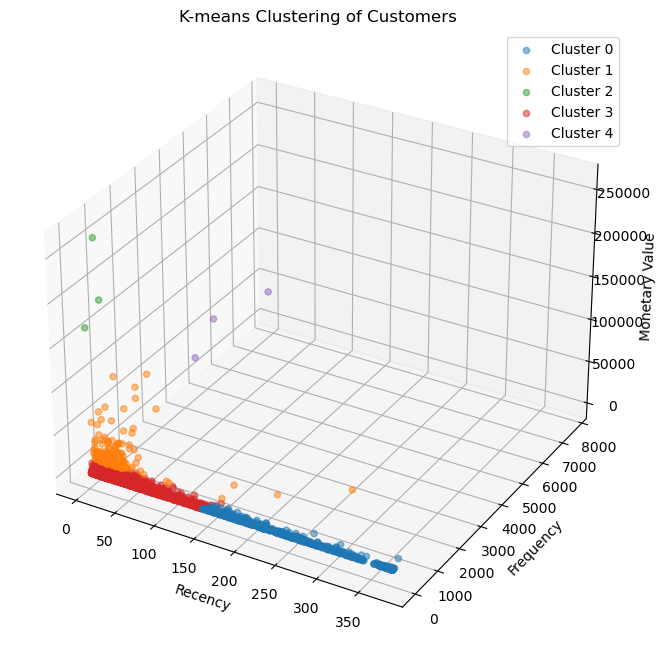

In [484]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a new figure and axis for 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each cluster in 3D space
for cluster in range(5):
    ax.scatter(rfm.loc[kmeans.labels_ == cluster, 'recency'], 
               rfm.loc[kmeans.labels_ == cluster, 'frequency'], 
               rfm.loc[kmeans.labels_ == cluster, 'monetary_value'], 
               label=f'Cluster {cluster}', alpha=0.5)

# Add labels and title
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Value')
ax.set_title('K-means Clustering of Customers')

# Add legend
plt.legend()

plt.show()


In [485]:
rfm['Cluster'].value_counts()

Cluster
3    2781
0     964
1     169
4       3
2       3
Name: count, dtype: int64

In [486]:
mean=rfm.groupby('Cluster').mean(numeric_only=True)

In [487]:
rfm_kmeans=mean
rfm_kmeans.index = ['0 Mean', '1 Mean', '2 Mean','3 mean','4 mean']

In [488]:
rfm_kmeans.T

,0 Mean,1 Mean,2 Mean,3 mean,4 mean
recency,248.651452,17.674556,4.666667,44.860482,3.666667
frequency,27.300830,536.917160,256.666667,77.003596,5732.333333
monetary_value,448.271837,14054.788994,207506.863333,1336.291709,46245.106667


In [489]:
#these observation was made for UK similarly we can do segmentation for different countries

Cluster 0 ("0 Mean") - Moderate Buyers with High Recency
Strategy: Re-engagement Campaigns

Personalized Offers: Send personalized emails or ads with moderate discounts to bring them back, since they haven’t made a purchase recently.
Reminders and Follow-ups: Use reminders about products they’ve viewed or abandoned in their cart.
Seasonal Promotions: Promote seasonal or limited-time offers to create urgency.
Goal: Encourage recent but moderate buyers to make repeat purchases by rekindling their interest with modest incentives.

Cluster 1 ("1 Mean") - High-Frequency, High-Value Customers
Strategy: Loyalty and Upsell Programs

Exclusive Loyalty Rewards: Offer a tiered loyalty program or exclusive benefits for their high value and frequent purchases. This might include early access to new products or additional discounts.
Upsell and Cross-sell: Suggest premium products or complementary items to increase the average order value.
Engagement Programs: Create a community, invite them to VIP events, or provide a referral program to bring in similar customers.
Goal: Retain these valuable customers and increase their spending by making them feel appreciated and incentivized to continue shopping.

Cluster 2 ("2 Mean") - Recent, High-Value but Moderate Frequency Buyers
Strategy: High-Value Customer Retention

Personalized Offers on High-Value Items: Since they already make high-value purchases, give them targeted discounts or bundles on similar high-end products.
Frequent Purchase Reminders: Send gentle reminders of their previous high-value purchase with recommendations on similar products.
Feedback and Appreciation: Collect feedback on their experience, showing appreciation for their high-value purchases to build brand loyalty.
Goal: Retain these high-spending but less frequent customers by keeping them engaged and aware of the value you offer.

Cluster 3 ("3 Mean") - Moderate Recency, Frequency, and Value
Strategy: Incentivize Loyalty and Frequency

Mid-Tier Loyalty Program: Encourage these moderate buyers to become more frequent customers with a loyalty program that rewards purchases with points or small perks.
Periodic Discount Campaigns: Offer periodic discounts or bundled deals that fit their moderate spending pattern.
Educational Content: Send helpful information, like product tips or usage ideas, to deepen brand engagement.
Goal: Increase their purchase frequency and engagement to eventually move them into a higher-value segment.

Cluster 4 ("4 Mean") - Low Frequency, High Value
Strategy: Encourage Frequency through Targeted Incentives

Reactivation Campaign: Offer a strong discount on their next purchase or an exclusive voucher to reactivate their buying behavior.
High-Value Product Recommendations: Suggest products that match their purchasing style, focusing on high-ticket items.
Enhanced Customer Service: Reach out to understand their purchase cycle and address any specific needs or preferences.
Goal: Turn occasional, high-value customers into more regular buyers by re-engaging them with relevant, high-value offers.